In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\Users\p_yenkar\Desktop\DataScience-Portfolio\NLP_Projects\Question_pairs\Data\train.csv')

In [3]:
df.shape

(404290, 6)

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [6]:
df.describe()

,id,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198
std,116708.614503,157751.700002,159903.182629,0.482588
min,0.000000,1.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


In [7]:
new_df=df.sample(30000)

In [8]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [9]:
ques_df=new_df[['question1','question2']]

In [10]:
ques_df.head(5)

,question1,question2
231660,If ripple labs succeed will their currency xrp...,When will ripple make me rich?
150017,What is the right age to start-up?,What is the right age to start business?
84085,Can porn stars get attached from having sex wi...,Has it ever happened that porn stars actually ...
288731,Can intelligence be referenced?,Will computers ever be able to match the human...
374216,Does anyone succeed decrypt (or know about the...,What is an example of popular culture (TV show...


In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
questions=list(ques_df['question1'])+list(ques_df['question2'])
cv=CountVectorizer(max_features=3000)

In [13]:
q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)

In [14]:
q1_arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
temp_df1=pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2=pd.DataFrame(q2_arr,index=ques_df.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(30000, 6000)

In [16]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
231660,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84085,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
288731,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
374216,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249082,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181417,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
291305,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
243781,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
temp_df['is_duplicate']=new_df['is_duplicate']

In [18]:
temp_df.shape

(30000, 6001)

In [19]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
231660,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
84085,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
288731,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
374216,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249082,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181417,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
291305,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
243781,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Phase1-Without Adding any features


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(temp_df.iloc[:,:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=42)

#### RandomForest

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.736

#### XGBOOST

In [22]:
from xgboost import XGBClassifier

xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7276666666666667

In [23]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
231660,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
84085,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
288731,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
374216,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249082,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181417,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
291305,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
243781,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
temp_df['is_duplicate'].value_counts()

is_duplicate
0    19156
1    10844
Name: count, dtype: int64

<Axes: xlabel='is_duplicate'>

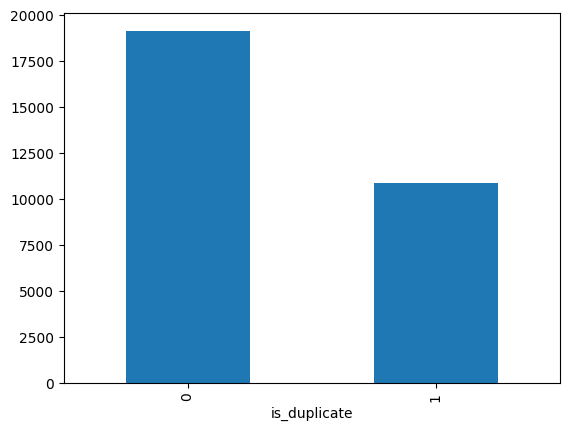

In [25]:
temp_df['is_duplicate'].value_counts().plot(kind='bar')

In [26]:
type(temp_df)

pandas.core.frame.DataFrame

In [27]:
temp_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
231660,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
84085,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
288731,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
374216,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
new_df['is_duplicate'].value_counts()

is_duplicate
0    19156
1    10844
Name: count, dtype: int64

In [29]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate
231660,231660,341520,341521,If ripple labs succeed will their currency xrp...,When will ripple make me rich?,0
150017,150017,236186,236187,What is the right age to start-up?,What is the right age to start business?,1
84085,84085,142217,130838,Can porn stars get attached from having sex wi...,Has it ever happened that porn stars actually ...,0
288731,288731,409738,409739,Can intelligence be referenced?,Will computers ever be able to match the human...,0
374216,374216,505092,505093,Does anyone succeed decrypt (or know about the...,What is an example of popular culture (TV show...,0
...,...,...,...,...,...,...
249082,249082,2141,362630,What is the salary of a doctor in India?,What is the range of doctors' salaries in bigg...,0
181417,181417,277926,277927,Can my phone speak a next language to someone ...,Can I pretend to be someone else on Snapchat?,0
291305,291305,412714,412715,Do I have to shave before getting laser hair r...,Should you shave before getting laser hair rem...,1
243781,243781,356279,356280,Will low displacement bikes like Yamaha MT-15 ...,How frequent do Indians masturbate on an average?,0


In [30]:
qid=pd.Series(new_df['question1'].tolist()+new_df['question2'].tolist())
print('unique questions-',np.unique(qid).shape[0])


unique questions- 55487


In [31]:
qid

0        If ripple labs succeed will their currency xrp...
1                       What is the right age to start-up?
2        Can porn stars get attached from having sex wi...
3                          Can intelligence be referenced?
4        Does anyone succeed decrypt (or know about the...
                               ...                        
59995    What is the range of doctors' salaries in bigg...
59996        Can I pretend to be someone else on Snapchat?
59997    Should you shave before getting laser hair rem...
59998    How frequent do Indians masturbate on an average?
59999    What are some good ideas for research projects...
Length: 60000, dtype: object

In [32]:
x=qid.value_counts()>1
print('Duplicate',x[x].shape[0])

Duplicate 3376


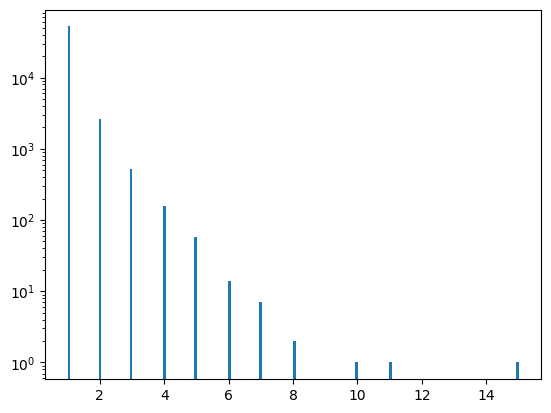

In [33]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

### Phase2-After Adding few features

### Feature Engineering

In [34]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate
231660,231660,341520,341521,If ripple labs succeed will their currency xrp...,When will ripple make me rich?,0
150017,150017,236186,236187,What is the right age to start-up?,What is the right age to start business?,1
84085,84085,142217,130838,Can porn stars get attached from having sex wi...,Has it ever happened that porn stars actually ...,0
288731,288731,409738,409739,Can intelligence be referenced?,Will computers ever be able to match the human...,0
374216,374216,505092,505093,Does anyone succeed decrypt (or know about the...,What is an example of popular culture (TV show...,0
...,...,...,...,...,...,...
249082,249082,2141,362630,What is the salary of a doctor in India?,What is the range of doctors' salaries in bigg...,0
181417,181417,277926,277927,Can my phone speak a next language to someone ...,Can I pretend to be someone else on Snapchat?,0
291305,291305,412714,412715,Do I have to shave before getting laser hair r...,Should you shave before getting laser hair rem...,1
243781,243781,356279,356280,Will low displacement bikes like Yamaha MT-15 ...,How frequent do Indians masturbate on an average?,0


In [35]:
new_df['q1_length']=new_df['question1'].str.len()
new_df['q2_length']=new_df['question2'].str.len()

In [36]:
new_df['q1_num_words']=new_df['question1'].apply(lambda x: len(x.split(" ")))
new_df['q2_num_words']=new_df['question2'].apply(lambda x: len(x.split(" ")))

In [37]:
new_df[new_df['is_duplicate']==1]

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length,q1_num_words,q2_num_words
150017,150017,236186,236187,What is the right age to start-up?,What is the right age to start business?,1,34,40,7,8
314730,314730,209764,123307,What are some of the most underrated pleasures...,What is the most UNDERRATED pleasure?,1,55,37,10,6
142104,142104,25318,4017,The Indian government is banning the Rs. 500 &...,How is replacing 1000 rs notes with 2000 rs no...,1,166,98,34,19
185206,185206,113568,282780,What are your favorite fruits?,What is/are your favorite fruit/s?,1,30,34,5,5
319537,319537,444974,444975,What are good websites for starting a new blog?,What are the best blog websites to start a new...,1,47,52,9,11
...,...,...,...,...,...,...,...,...,...,...
203191,203191,305738,305739,Which C++ compiler do you recommend for windows?,Which c++ compiler should I use in Windows?,1,48,43,8,8
181908,181908,113567,88499,What are some mind blowing technology that mos...,What are some mind-blowing Bike gadgets that e...,1,72,85,12,14
54319,54319,95906,95907,Do you think Virat Kohli can better Sachin's r...,"The way Virat Kohli is playing, do you thing h...",1,52,74,9,14
129867,129867,208526,208527,What are some examples of electronic devices?,What are examples of electronic devices?,1,45,40,7,6


In [38]:
def common_words(row):
    w1= set(map(lambda word : word.lower().strip(),row['question1'].split(" ")))
    w2= set(map(lambda word : word.lower().strip(),row['question2'].split(" ")))
    return len(w1 & w2)

In [39]:
new_df['common_words']=new_df.apply(common_words,axis=1)

In [40]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length,q1_num_words,q2_num_words,common_words
231660,231660,341520,341521,If ripple labs succeed will their currency xrp...,When will ripple make me rich?,0,99,30,17,6,2
150017,150017,236186,236187,What is the right age to start-up?,What is the right age to start business?,1,34,40,7,8,6
84085,84085,142217,130838,Can porn stars get attached from having sex wi...,Has it ever happened that porn stars actually ...,0,60,92,11,17,5
288731,288731,409738,409739,Can intelligence be referenced?,Will computers ever be able to match the human...,0,31,85,4,14,1
374216,374216,505092,505093,Does anyone succeed decrypt (or know about the...,What is an example of popular culture (TV show...,0,141,199,20,32,2
...,...,...,...,...,...,...,...,...,...,...,...
249082,249082,2141,362630,What is the salary of a doctor in India?,What is the range of doctors' salaries in bigg...,0,40,102,9,20,6
181417,181417,277926,277927,Can my phone speak a next language to someone ...,Can I pretend to be someone else on Snapchat?,0,51,45,10,9,3
291305,291305,412714,412715,Do I have to shave before getting laser hair r...,Should you shave before getting laser hair rem...,1,71,51,14,8,5
243781,243781,356279,356280,Will low displacement bikes like Yamaha MT-15 ...,How frequent do Indians masturbate on an average?,0,91,49,15,8,0


In [41]:
def total_words(row):
    w1= set(map(lambda word : word.lower().strip(),row['question1'].split(" ")))
    w2= set(map(lambda word : word.lower().strip(),row['question2'].split(" ")))
    return (len(w1) + len(w2))

In [42]:
new_df['total_words']=new_df.apply(total_words,axis=1)

In [43]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length,q1_num_words,q2_num_words,common_words,total_words
231660,231660,341520,341521,If ripple labs succeed will their currency xrp...,When will ripple make me rich?,0,99,30,17,6,2,23
150017,150017,236186,236187,What is the right age to start-up?,What is the right age to start business?,1,34,40,7,8,6,15
84085,84085,142217,130838,Can porn stars get attached from having sex wi...,Has it ever happened that porn stars actually ...,0,60,92,11,17,5,28
288731,288731,409738,409739,Can intelligence be referenced?,Will computers ever be able to match the human...,0,31,85,4,14,1,18
374216,374216,505092,505093,Does anyone succeed decrypt (or know about the...,What is an example of popular culture (TV show...,0,141,199,20,32,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...
249082,249082,2141,362630,What is the salary of a doctor in India?,What is the range of doctors' salaries in bigg...,0,40,102,9,20,6,28
181417,181417,277926,277927,Can my phone speak a next language to someone ...,Can I pretend to be someone else on Snapchat?,0,51,45,10,9,3,19
291305,291305,412714,412715,Do I have to shave before getting laser hair r...,Should you shave before getting laser hair rem...,1,71,51,14,8,5,22
243781,243781,356279,356280,Will low displacement bikes like Yamaha MT-15 ...,How frequent do Indians masturbate on an average?,0,91,49,15,8,0,23


In [44]:
new_df['word_share']=round(new_df['common_words']/new_df['total_words'],2)

In [45]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length,q1_num_words,q2_num_words,common_words,total_words,word_share
231660,231660,341520,341521,If ripple labs succeed will their currency xrp...,When will ripple make me rich?,0,99,30,17,6,2,23,0.09
150017,150017,236186,236187,What is the right age to start-up?,What is the right age to start business?,1,34,40,7,8,6,15,0.40
84085,84085,142217,130838,Can porn stars get attached from having sex wi...,Has it ever happened that porn stars actually ...,0,60,92,11,17,5,28,0.18
288731,288731,409738,409739,Can intelligence be referenced?,Will computers ever be able to match the human...,0,31,85,4,14,1,18,0.06
374216,374216,505092,505093,Does anyone succeed decrypt (or know about the...,What is an example of popular culture (TV show...,0,141,199,20,32,2,50,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249082,249082,2141,362630,What is the salary of a doctor in India?,What is the range of doctors' salaries in bigg...,0,40,102,9,20,6,28,0.21
181417,181417,277926,277927,Can my phone speak a next language to someone ...,Can I pretend to be someone else on Snapchat?,0,51,45,10,9,3,19,0.16
291305,291305,412714,412715,Do I have to shave before getting laser hair r...,Should you shave before getting laser hair rem...,1,71,51,14,8,5,22,0.23
243781,243781,356279,356280,Will low displacement bikes like Yamaha MT-15 ...,How frequent do Indians masturbate on an average?,0,91,49,15,8,0,23,0.00


minimum length - 7
maximum length - 370
avg length - 59


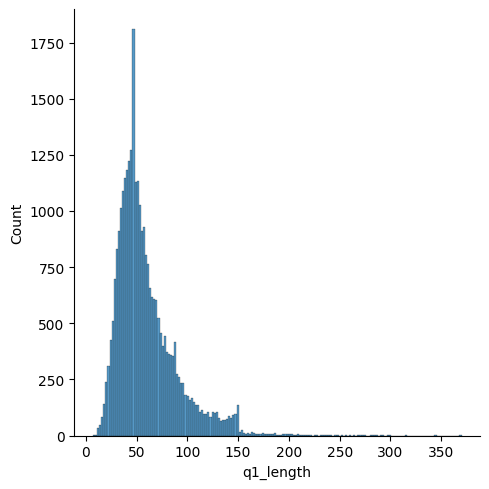

In [46]:
print('minimum length -',new_df['q1_length'].min())
print('maximum length -',new_df['q1_length'].max())
print('avg length -',int(new_df['q1_length'].mean()))
sns.displot(new_df['q1_length'])

minimum length - 1
maximum length - 1169
avg length - 60


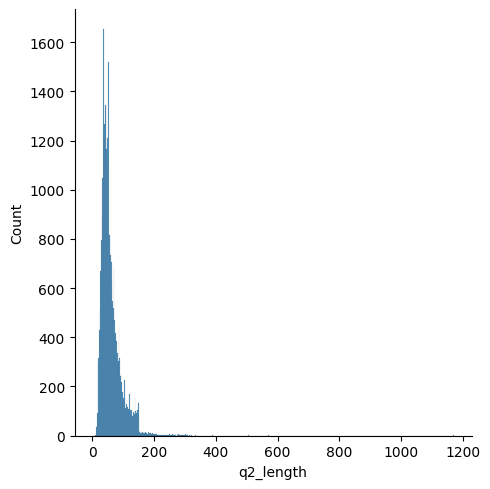

In [47]:
print('minimum length -',new_df['q2_length'].min())
print('maximum length -',new_df['q2_length'].max())
print('avg length -',int(new_df['q2_length'].mean()))
sns.displot(new_df['q2_length'])

minimum length - 1
maximum length - 66
avg length - 10


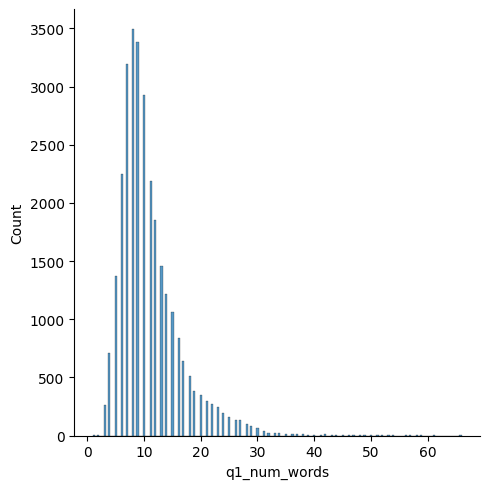

In [48]:
print('minimum length -',new_df['q1_num_words'].min())
print('maximum length -',new_df['q1_num_words'].max())
print('avg length -',int(new_df['q1_num_words'].mean()))
sns.displot(new_df['q1_num_words'])

minimum length - 1
maximum length - 228
avg length - 11


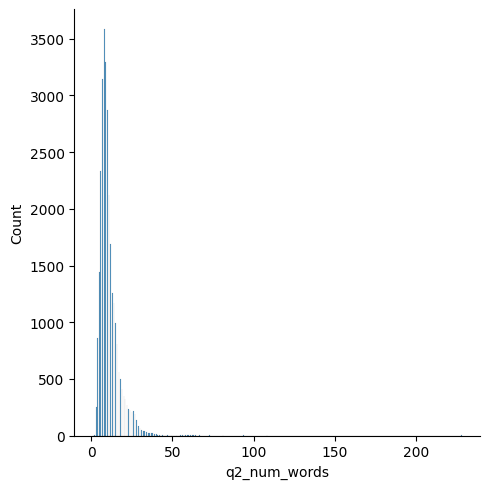

In [49]:
print('minimum length -',new_df['q2_num_words'].min())
print('maximum length -',new_df['q2_num_words'].max())
print('avg length -',int(new_df['q2_num_words'].mean()))
sns.displot(new_df['q2_num_words'])

C:\Users\p_yenkar\AppData\Local\Temp\ipykernel_10284\810850481.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


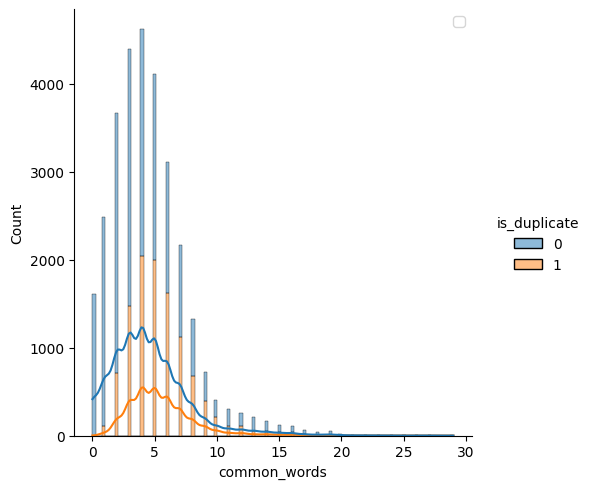

In [57]:
#sns.displot(new_df[new_df['is_duplicate']==0]['common_words'],label='Non Duplicate')
#sns.displot(new_df[new_df['is_duplicate']==1]['common_words'],label='Duplicate')

sns.displot(data=new_df, x='common_words', hue='is_duplicate', 
            kind='hist', kde=True, multiple='stack')
plt.legend()
plt.show()


C:\Users\p_yenkar\AppData\Local\Temp\ipykernel_10284\1658019384.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<Figure size 500x500 with 0 Axes>

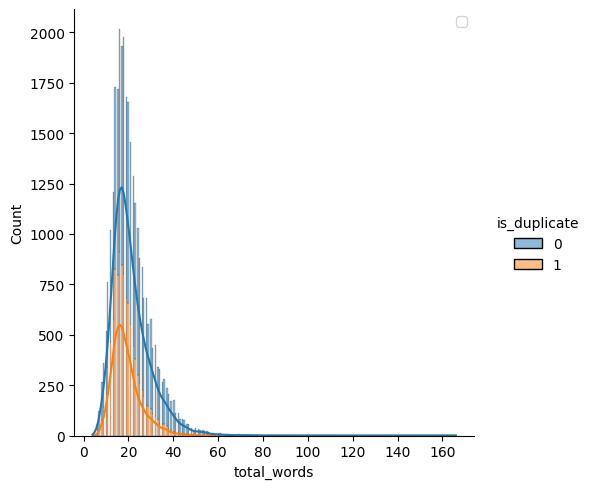

In [55]:
plt.figure(figsize=(5,5))
#sns.displot(new_df[new_df['is_duplicate']==0]['total_words'],label='Non Duplicate')
#sns.displot(new_df[new_df['is_duplicate']==1]['total_words'],label='Duplicate')
sns.displot(data=new_df, x='total_words', hue='is_duplicate', 
            kind='hist', kde=True, multiple='stack')
plt.legend()
plt.show()

C:\Users\p_yenkar\AppData\Local\Temp\ipykernel_10284\4118008224.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<Figure size 500x500 with 0 Axes>

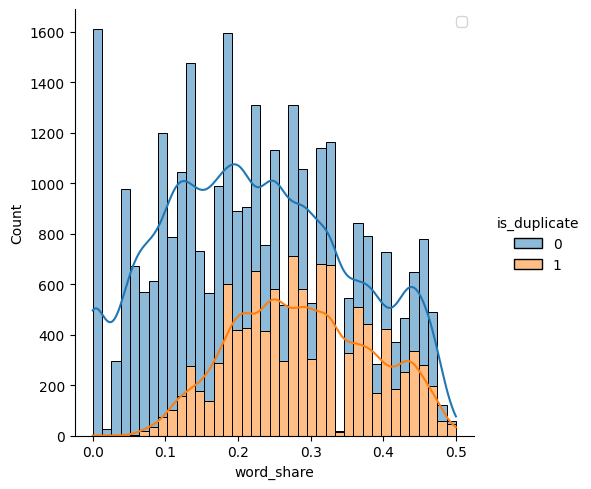

In [58]:
plt.figure(figsize=(5,5))
#sns.displot(new_df[new_df['is_duplicate']==0]['total_words'],label='Non Duplicate')
#sns.displot(new_df[new_df['is_duplicate']==1]['total_words'],label='Duplicate')
sns.displot(data=new_df, x='word_share', hue='is_duplicate', 
            kind='hist', kde=True, multiple='stack')
plt.legend()
plt.show()

In [60]:
new_df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length,q1_num_words,q2_num_words,common_words,total_words,word_share
231660,231660,341520,341521,If ripple labs succeed will their currency xrp...,When will ripple make me rich?,0,99,30,17,6,2,23,0.09
150017,150017,236186,236187,What is the right age to start-up?,What is the right age to start business?,1,34,40,7,8,6,15,0.40


In [75]:
new_df.shape

(30000, 13)

In [76]:
q_df=new_df[['question1','question2']]
q_df.head(2)

,question1,question2
231660,If ripple labs succeed will their currency xrp...,When will ripple make me rich?
150017,What is the right age to start-up?,What is the right age to start business?


In [88]:
final_df=new_df.drop(columns=['id','qid1','qid2','question1','question2'])
final_df.head(2)

,is_duplicate,q1_length,q2_length,q1_num_words,q2_num_words,common_words,total_words,word_share
231660,0,99,30,17,6,2,23,0.09
150017,1,34,40,7,8,6,15,0.40


In [78]:
q_df[['question1','question2']]=q_df[['question1','question2']].fillna('')

C:\Users\p_yenkar\AppData\Local\Temp\ipykernel_10284\509168817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_df[['question1','question2']]=q_df[['question1','question2']].fillna('')


In [79]:
q_df.shape

(30000, 2)

In [80]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=3000)
questions=list(q_df['question1'])+ list (q_df['question2'])

q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)

In [82]:
temp_df1=pd.DataFrame(q1_arr,index=q_df.index)
temp_df2=pd.DataFrame(q2_arr,index=q_df.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(30000, 6000)

In [89]:
final_df=pd.concat([final_df,temp_df],axis=1)
final_df.shape

(30000, 6008)

In [90]:
final_df.head(2)

,is_duplicate,q1_length,q2_length,q1_num_words,q2_num_words,common_words,total_words,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
231660,0,99,30,17,6,2,23,0.09,0,0,...,0,0,0,0,0,0,0,0,0,0
150017,1,34,40,7,8,6,15,0.40,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,train_size=0.8,random_state=42)

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7576666666666667

In [102]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7595

### Acuracy before adding features : RandomForest=0.736,             XGBoost=0.727
### Acuracy After adding features  : RandomForest=0.757,           XGBoost=0.759   

## Phase 3 : Adding preprocessing and some extra features

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv(r'C:\Users\p_yenkar\Desktop\DataScience-Portfolio\NLP_Projects\Question_pairs\Data\train.csv')

In [6]:
new_df=df.sample(30000,random_state=2)

In [7]:
new_df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0


In [8]:
import json
def preprocess(q):

    q=str(q).lower().strip()

    #Replace special char
    q=q.replace('%',' percent')
    q=q.replace('$',' dollar')
    q=q.replace('@',' at')

    #The pattern '[math]'
    q=q.replace('[math]','')

    #replace numbers
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)

    with open(r'C:\Users\p_yenkar\Desktop\DataScience-Portfolio\NLP_Projects\Question_pairs\Code\word_list.txt', 'r') as f:
        q_dewords = json.load(f)

    q_decon=[]

    for word in q.split():
        if word in  q_dewords:
            word=q_dewords[word]

        q_decon.append(word)    

    q=' '.join(q_decon)

    #Remove HTML Tag
    q=BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q
    





In [9]:
new_df['question1']=new_df['question1'].apply(preprocess)
new_df['question2']=new_df['question2'].apply(preprocess)

In [10]:
new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [11]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,13,16
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,28,21
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,14,32
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9


In [12]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [13]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,12
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,13,16,8
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,28,21,4
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,14,32,1
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9,3


In [14]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,12,26
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,13,16,8,24
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,28,21,4,38
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,14,32,1,34
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9,3,13


In [15]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,12,26,0.46
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,13,16,8,24,0.33
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,28,21,4,38,0.11
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,14,32,1,34,0.03
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9,3,13,0.23


In [16]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,12,26,0.46
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,13,16,8,24,0.33
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,28,21,4,38,0.11
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,14,32,1,34,0.03
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9,3,13,0.23


### new features

In [17]:
from nltk.corpus import stopwords

In [18]:
def fetch_token_features(row):
    stop_words=stopwords.words("english")
    token_features=[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]

    q1=row['question1']
    q2=row['question2']

    q1_tokens=q1.split()
    q2_tokens=q2.split()

    if len(q1_tokens)==0 or len(q2_tokens)==0:
        return token_features
    
    #extract non stopwords
    q1_words=set([word for word in q1_tokens if word  not in stop_words])
    q2_words=set([word for word in q2_tokens if word  not in stop_words])

    # extract stopwords
    q1_stpwords=set([word for word in q1_tokens if word  in stop_words])
    q2_stpwords=set([word for word in q2_tokens if word  in stop_words])

    #common words 
    common_word_cnt=len(q1_words.intersection(q2_words))

    #common stop words 
    common_stpword_cnt=len(q1_stpwords.intersection(q2_stpwords))

    #common tokens
    common_tokens_cnt=len(set(q1_tokens).intersection(set(q2_tokens)))

    #calculate all token features
    token_features[0]=common_word_cnt/ (min(len(q1_words),len(q2_words))+0.00001)
    token_features[1]=common_word_cnt/ (max(len(q1_words),len(q2_words))+0.000010)
    token_features[2]=common_stpword_cnt/ (min(len(q1_stpwords),len(q2_stpwords))+0.00001)
    token_features[3]=common_stpword_cnt/ (max(len(q1_stpwords),len(q2_stpwords))+0.00001)
    token_features[4]=common_tokens_cnt/ (min(len(q1_tokens),len(q2_tokens))+0.00001)
    token_features[5]=common_tokens_cnt/ (max(len(q1_tokens),len(q2_tokens))+0.00001)

    # Last words are same or not
    token_features[6]=int(q1_tokens[-1]==q2_tokens[-1])

    # First words are same or not
    token_features[7]=int(q1_tokens[0]==q2_tokens[0])

    return token_features




In [19]:
token_features =new_df.apply(fetch_token_features,axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [20]:
new_df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,...,26,0.46,0.874999,0.874999,0.999998,0.999998,0.923076,0.923076,1.0,1.0
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,13,16,...,24,0.33,0.666664,0.499999,0.714285,0.624999,0.583333,0.466666,1.0,1.0


In [21]:
import distance
def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [22]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff']         = list(map(lambda x: x[0], length_features))
new_df['mean_len']             = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [23]:
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [24]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [25]:
new_df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,...,0.923076,1.0,1.0,0.0,13.0,0.855263,99,99,99,99
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,13,16,...,0.466666,1.0,1.0,3.0,13.5,0.224490,69,67,65,74


In [26]:
new_df_train=pd.Series(list(new_df.question1)+list(new_df.question2))

In [27]:
new_df_train

0        what is the best marketing automation tool for...
1         i am poor but i want to invest  what should i do
2        i am from india and live abroad  i met a guy f...
3        why do so many people in the u s  hate the sou...
4                       consequences of bhopal gas tragedy
                               ...                        
59995             what are some good web scraping programs
59996    i have internet banking kit of sbi but it is n...
59997    can i use regular dawn dishsoap in my dishwash...
59998         what are some of the best ways to learn math
59999    if pakistan mounts a 26 11 type attack again  ...
Length: 60000, dtype: object

(-0.5, 1999.5, 999.5, -0.5)

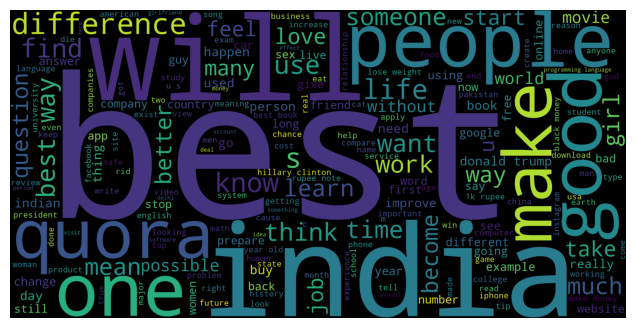

In [28]:
from wordcloud import WordCloud
cloud = WordCloud(width=2000, height=1000).generate(" ".join(new_df_train.astype(str)))
plt.figure(figsize=(8, 4))
plt.imshow(cloud)
plt.axis('off')

<Axes: xlabel='is_duplicate'>

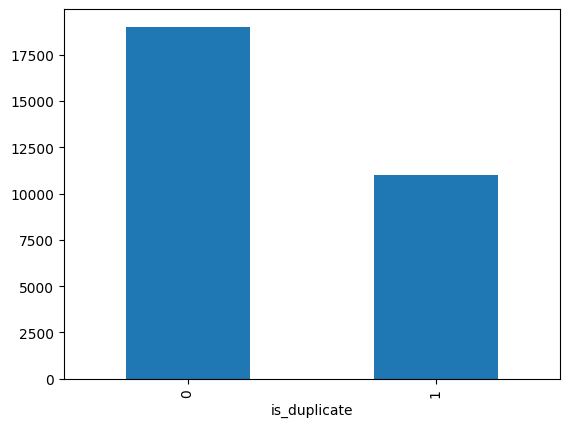

In [29]:
new_df.groupby('is_duplicate')['id'].count().plot.bar()

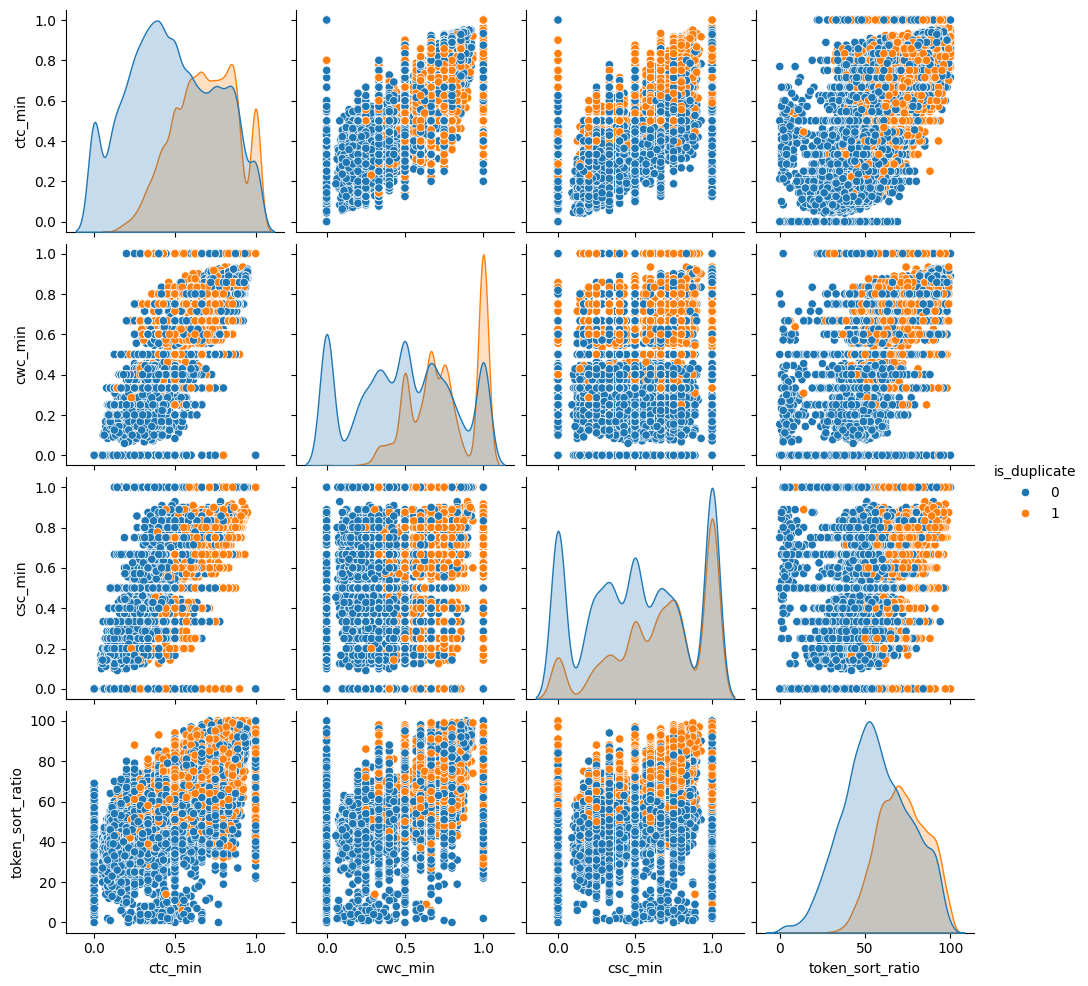

In [30]:
n = new_df.shape[0]
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio', 'is_duplicate']][0:n], hue='is_duplicate', vars=['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'])
plt.show()

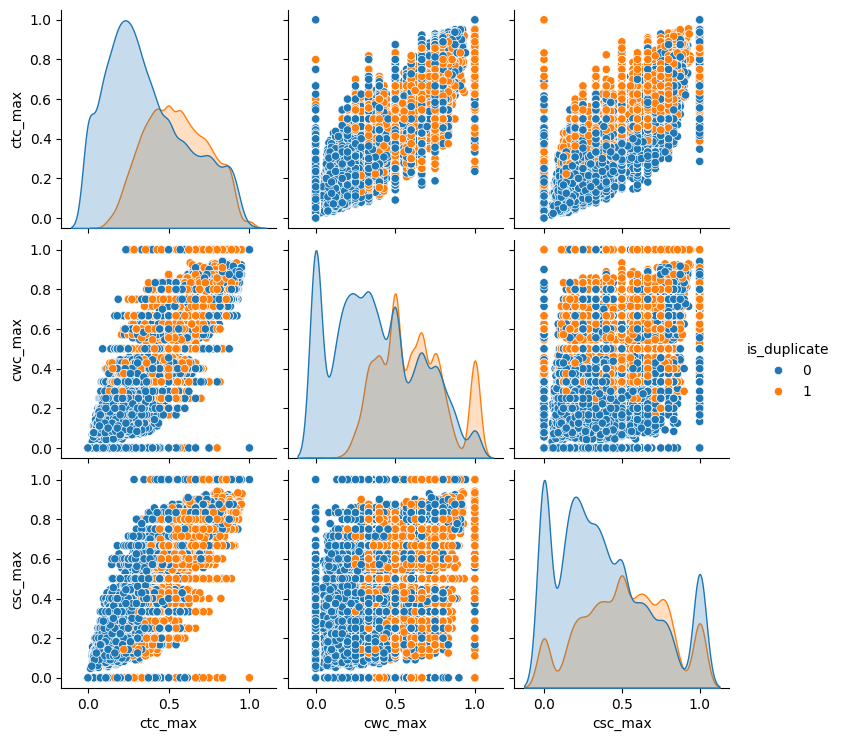

In [31]:
n = new_df.shape[0]
sns.pairplot(new_df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']][0:n], hue='is_duplicate')
plt.show()

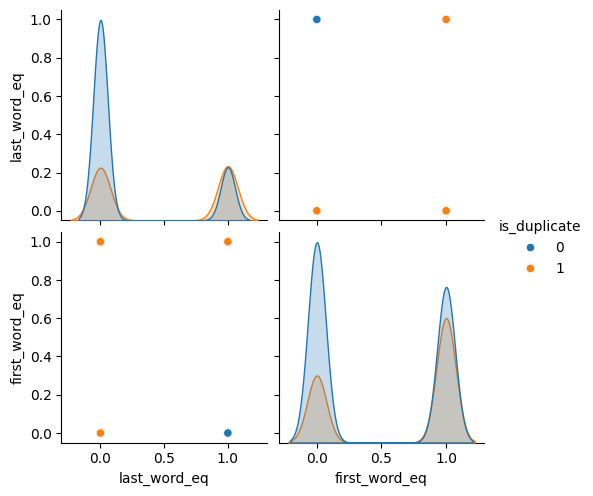

In [32]:
n = new_df.shape[0]
sns.pairplot(new_df[['last_word_eq', 'first_word_eq', 'is_duplicate']][0:n], hue='is_duplicate')
plt.show()

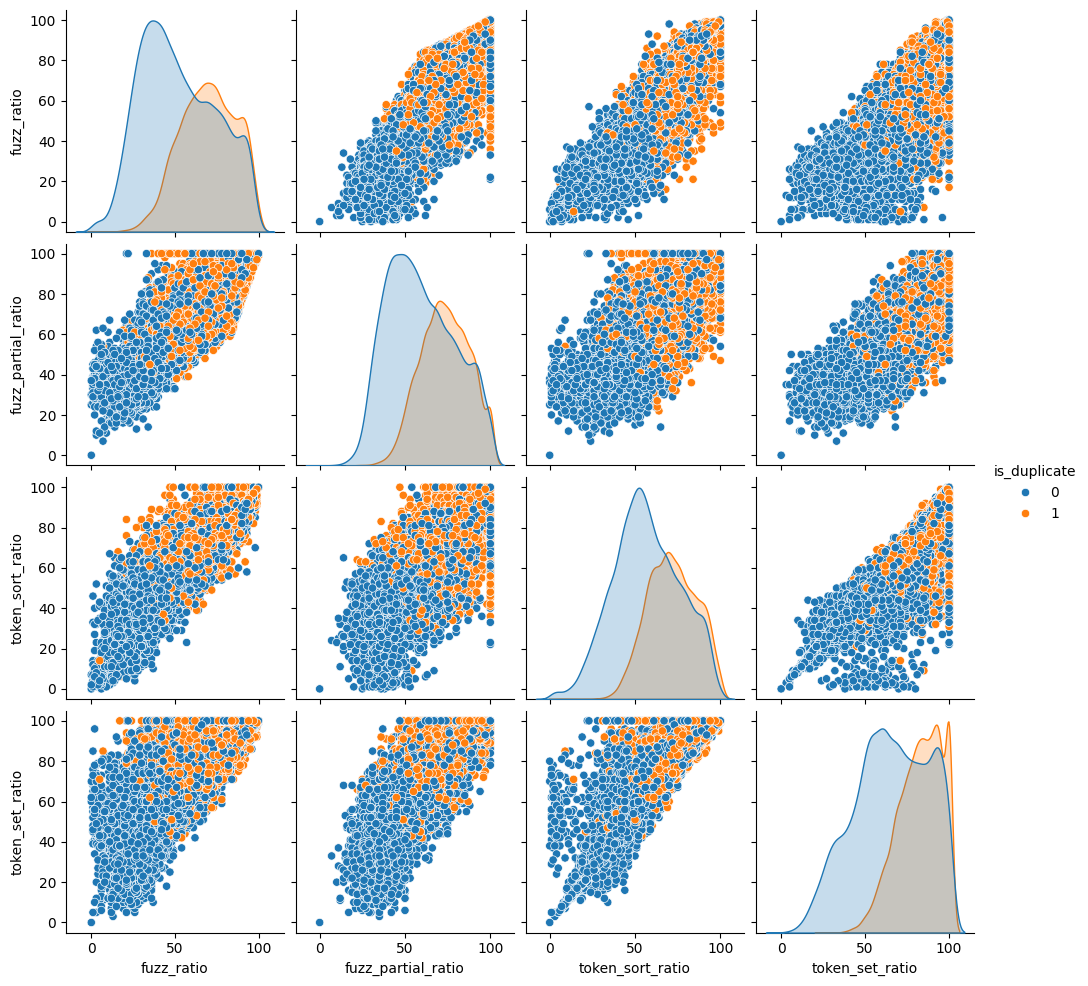

In [33]:
n = new_df.shape[0]
sns.pairplot(new_df[['fuzz_ratio', 'fuzz_partial_ratio', 'token_sort_ratio','token_set_ratio','is_duplicate']][0:n], hue='is_duplicate')
plt.show()


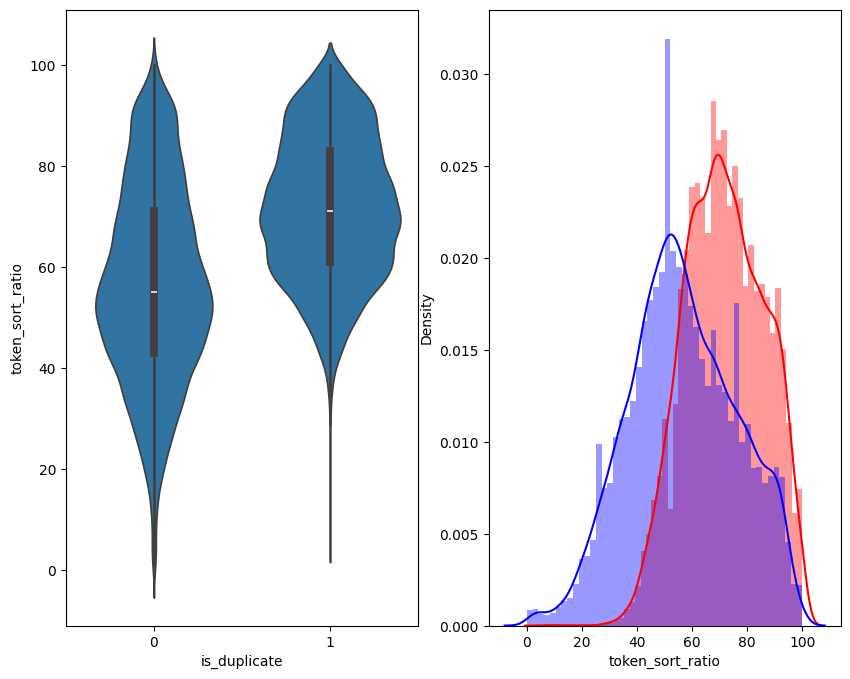

In [34]:
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'token_sort_ratio', data = new_df[0:] , )

plt.subplot(1,2,2)
sns.distplot(new_df[new_df['is_duplicate'] == 1.0]['token_sort_ratio'][0:] , label = "1", color = 'red')
sns.distplot(new_df[new_df['is_duplicate'] == 0.0]['token_sort_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

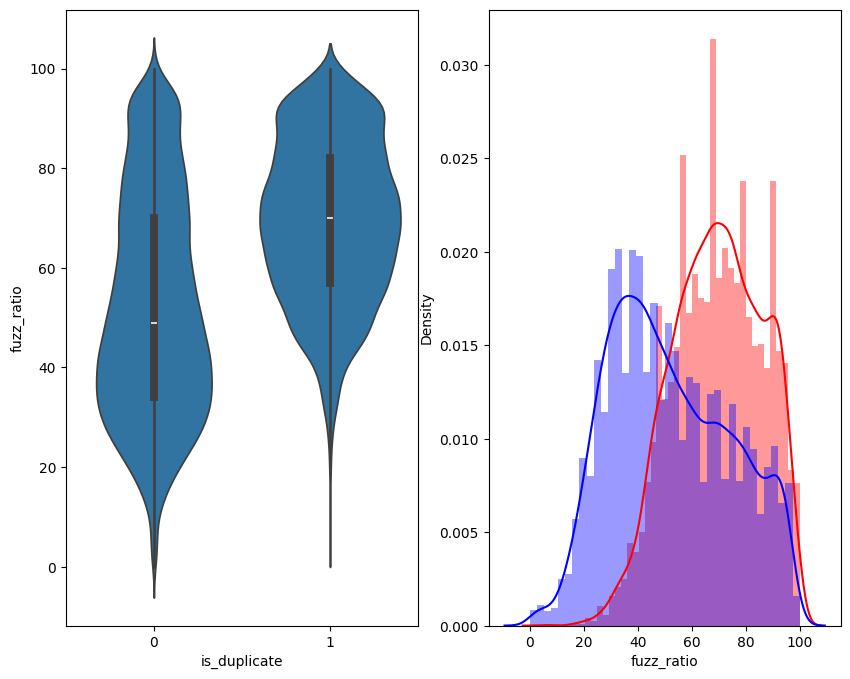

In [35]:
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'fuzz_ratio', data = new_df[0:] , )

plt.subplot(1,2,2)
sns.distplot(new_df[new_df['is_duplicate'] == 1.0]['fuzz_ratio'][0:] , label = "1", color = 'red')
sns.distplot(new_df[new_df['is_duplicate'] == 0.0]['fuzz_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

In [36]:
new_df.head(3)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,...,0.923076,1.0,1.0,0.0,13.0,0.855263,99,99,99,99
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,13,16,...,0.466666,1.0,1.0,3.0,13.5,0.224490,69,67,65,74
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,28,21,...,0.115385,0.0,0.0,6.0,23.0,0.047619,26,29,34,43


In [37]:
new_df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'q1_len', 'q2_len', 'q1_num_words', 'q2_num_words', 'word_common',
       'word_total', 'word_share', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max',
       'ctc_min', 'ctc_max', 'last_word_eq', 'first_word_eq', 'abs_len_diff',
       'mean_len', 'longest_substr_ratio', 'fuzz_ratio', 'fuzz_partial_ratio',
       'token_sort_ratio', 'token_set_ratio'],
      dtype='object')

In [38]:
ques_df=new_df[['question1','question2']]
ques_df.head(2)

,question1,question2
398782,what is the best marketing automation tool for...,what is the best marketing automation tool for...
115086,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...


In [39]:
ques_df.shape

(30000, 2)

In [40]:
final_df=new_df.drop(columns=['id', 'qid1', 'qid2', 'question1', 'question2'])
final_df.head(2)
final_df.shape

(30000, 23)

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=3000)
qs=list(ques_df['question1'])+list(ques_df['question2'])

q1_arr,q2_arr=np.vsplit(cv.fit_transform(qs).toarray(),2)

temp_df1=pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2=pd.DataFrame(q2_arr,index=ques_df.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape


(30000, 6000)

In [42]:
final_df=pd.concat([final_df,temp_df],axis=1)
final_df.shape

(30000, 6023)

In [43]:
final_df.head(2)

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,1,75,76,13,13,12,26,0.46,0.874999,0.874999,...,0,0,0,0,0,0,0,0,0,0
115086,0,48,56,13,16,8,24,0.33,0.666664,0.499999,...,0,0,0,0,0,0,0,0,0,0


In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,train_size=0.8,random_state=42)

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7886666666666666

In [46]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_predict=xgb.predict(X_test)
accuracy_score(y_test,y_predict)

0.7861666666666667

### Phase 1 : Acuracy before adding features : RandomForest=0.736,             XGBoost=0.727
### Phase 2 : Acuracy After adding features  : RandomForest=0.757,           XGBoost=0.759  
### Phase 3 : Acuracy After preprocessing and adding more features  : RandomForest=0.784,           XGBoost=0.786  

In [47]:
from sklearn.metrics import confusion_matrix
# Randomforest
confusion_matrix(y_test,y_pred)



array([[3248,  551],
       [ 717, 1484]], dtype=int64)

In [48]:
#XGBoost
confusion_matrix(y_test,y_predict)


array([[3199,  600],
       [ 683, 1518]], dtype=int64)

In [49]:
''' from sklearn import svm
sv=svm.SVC()
sv.fit(X_train,y_train)
y_pred_svm=sv.predict(X_test)
accuracy_score(y_test,y_pred_svm) '''

' from sklearn import svm\nsv=svm.SVC()\nsv.fit(X_train,y_train)\ny_pred_svm=sv.predict(X_test)\naccuracy_score(y_test,y_pred_svm) '

### Tried SVM but its not executed even after 22 mins

In [54]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)

In [55]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [58]:
def test_fetch_fuzzy_features(q1,q2):
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [57]:
def test_fetch_length_features(q1,q2):
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [56]:
def test_fetch_token_features(q1,q2):
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [59]:
def query_point_creator(q1,q2):
    
    input_query = []
    
    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    
    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    
    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)
    
    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)
    
    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()
    
    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()
    
    
    
    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [69]:
q1='What is your name?'
q2='What is your name please?'

query_point_creator(q1,q2).shape


(1, 6022)

In [70]:
rf.predict(query_point_creator(q1,q2))

array([0], dtype=int64)

In [64]:
q3 = 'Where is the capital of India?'
q4 = 'What is the current capital of India?'
rf.predict(query_point_creator(q3,q4))


array([1], dtype=int64)

In [71]:
q5 = 'Where is the capital of India?'
q6 = 'What is the current capital of Pakistan?'
rf.predict(query_point_creator(q5,q6))

array([0], dtype=int64)